In [1]:
import os
from aocd import get_data
os.environ['AOC_SESSION'] = '53616c7465645f5f2390b1a2a8981260b4addfea3af95b32f034711559bdec07664fba46dcaafbd454968913573814f5'

In [2]:
data = get_data(year=2019,day=17)

In [3]:
os.chdir("..")
os.path.abspath(".")

from intcode import Intcode

In [64]:
ic = Intcode(data, input_queue=[])
ic.run()

def parse_scaffold(ic):
    new_lines = [i for i, v in enumerate(ic.output_queue) if v == 10]
    scaffold = []
    start = 0
    while new_lines:
        ix = new_lines.pop(0)
        row = [chr(i) for i in ic.output_queue[start:ix]]
        scaffold.append(row)
        start = ix + 1
    return [row for row in scaffold if len(row) > 0]

In [66]:
scaffold = parse_scaffold(ic)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
plt.rcParams["figure.figsize"] = [12, 9]

In [67]:
dot_x, dot_y = [], []
hash_x, hash_y = [], []
robot_x, robot_y = [], []
for y, row in enumerate(scaffold):
    for x, col in enumerate(row):
        if col == ".":
            dot_x.append(x)
            dot_y.append(-1*y)
        elif col == "#":
            hash_x.append(x)
            hash_y.append(-1*y)
        else:
            robot_x.append(x)
            robot_y.append(-1*y)

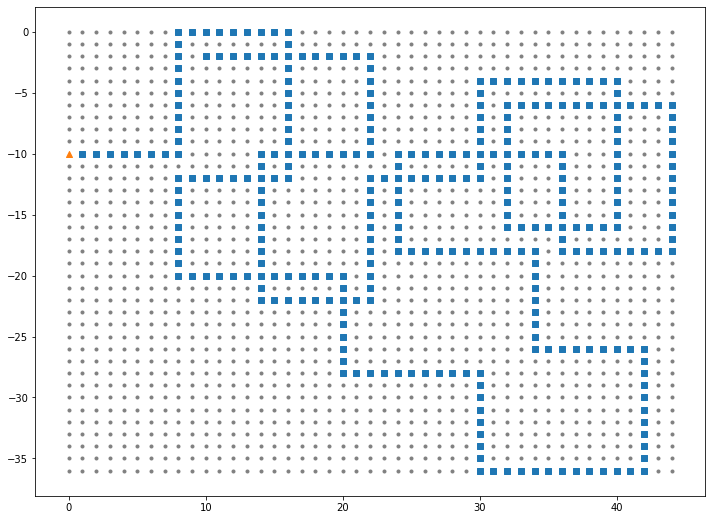

In [68]:
plt.scatter(dot_x, dot_y, marker=".", color="grey")
plt.scatter(hash_x, hash_y, marker="s")
plt.scatter(robot_x, robot_y, marker="^")

In [60]:
intersections = []
hashes = {}
for y, row in enumerate(scaffold):
    for x, col in enumerate(row):
        if col == "#":
            hashes[(x, y)] = col

for x, y in hashes:
    if hashes.get((x+1, y)) and hashes.get((x-1, y)) and hashes.get((x, y-1)) and hashes.get((x, y+1)):
        intersections.append((x,y))

In [40]:
intersections

[(16, 2),
 (40, 6),
 (16, 10),
 (30, 10),
 (32, 10),
 (14, 12),
 (24, 12),
 (36, 16),
 (14, 20),
 (20, 22)]

## Solve Part 1

In [41]:
total = 0
for x, y in intersections:
    total += x*y
total

2804

## Part 2

In [710]:
ic = Intcode("2" + data[1:], input_queue=[])
ic.run()
scaffold = parse_scaffold(ic)

In [279]:
dot_x, dot_y = [], []
hash_x, hash_y = [], []
robot_x, robot_y = [], []
for y, row in enumerate(scaffold):
    for x, col in enumerate(row):
        if col == ".":
            dot_x.append(x)
            dot_y.append(-1*y)
        elif col == "#":
            hash_x.append(x)
            hash_y.append(-1*y)
        elif col == "^":
            robot_x.append(x)
            robot_y.append(-1*y)

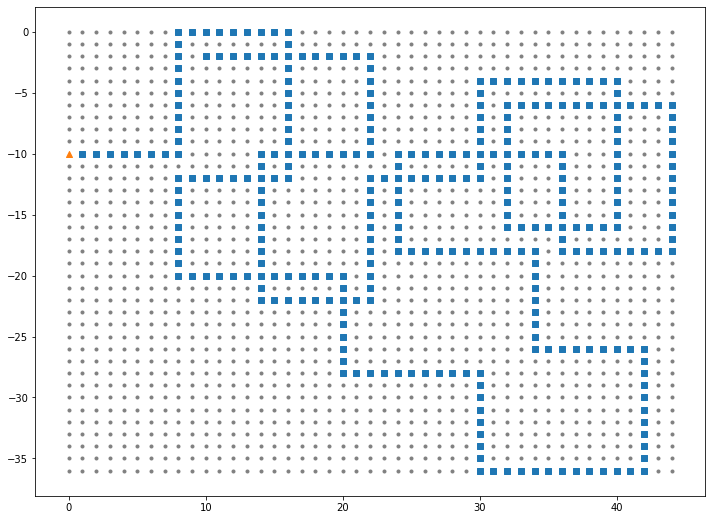

In [280]:
plt.scatter(dot_x, dot_y, marker=".", color="grey")
plt.scatter(hash_x, hash_y, marker="s")
plt.scatter(robot_x, robot_y, marker="^")

In [282]:
def find_next_step(hashes, position, direction):
    x, y = position
    if direction == "^":
        if hashes.get((x, y-1)):
            return (x, y-1), "^"
        # check right
        elif hashes.get((x+1, y)):
            return (x+1, y), ">"
        # check left
        elif hashes.get((x-1, y)):
            return (x-1, y), "<"
    if direction == "v":
        if hashes.get((x, y+1)):
            return (x, y+1), "v"
        # check right
        elif hashes.get((x+1, y)):
            return (x+1, y), ">"
        # check left
        elif hashes.get((x-1, y)):
            return (x-1, y), "<"
    if direction == ">":
        if hashes.get((x+1, y)):
            return (x+1, y), ">"
        # check up
        elif hashes.get((x, y+1)):
            return (x, y+1), "v"
        # check down
        elif hashes.get((x, y-1)):
            return (x, y-1), "^"
    if direction == "<":
        if hashes.get((x-1, y)):
            return (x-1, y), "<"
        # check up
        elif hashes.get((x, y+1)):
            return (x, y+1), "v"
        # check down
        elif hashes.get((x, y-1)):
            return (x, y-1), "^"

In [283]:
hashes = {}
for y, row in enumerate(scaffold):
    for x, col in enumerate(row):
        if col == "#":
            hashes[(x, y)] = col

In [284]:
trail = []
position = (0, 10)
direction = "^"

In [285]:
while True:
    try:
        position, direction = find_next_step(hashes, position, direction)
        trail.append((position, direction))
    except:
        break

In [660]:
instructions = []
directions = [t[1] for t in trail]

In [674]:
direction_changes = [i for i, d in enumerate(directions) if d != directions[i-1]]

In [681]:
instructions = []
for start, stop in zip(direction_changes, direction_changes[1:] + [len(directions)]):
    dirs = directions[start:stop]
    d = dirs[0]
    c = len(dirs)
    instructions.append((d, c))

In [683]:
better_instructions = []
for i, inst in enumerate(instructions):
    d, c = inst
    if i == 0:
        pd = "^"
    else:
        pd = instructions[i-1][0]
    if pd == "^" and d == ">":
        turn = "R"
    elif pd == "^" and d == "<":
        turn = "L"
    elif pd == "v" and d == "<":
        turn = "R"
    elif pd == "v" and d == ">":
        turn = "L"
    elif pd == ">" and d == "^":
        turn = "L"
    elif pd == ">" and d == "v":
        turn = "R"
    elif pd == "<" and d == "^":
        turn = "R"
    elif pd == "<" and d == "v":
        turn = "L"
    better_instructions.append(f"{turn}{c}")

In [686]:
steps = [b for b in better_instructions]
for i in range(0, len(better_instructions), 8):
    print(steps[i:i+8])

['R8', 'L10', 'R8', 'R12', 'R8', 'L8', 'L12', 'R8']
['L10', 'R8', 'L12', 'L10', 'L8', 'R8', 'L10', 'R8']
['R12', 'R8', 'L8', 'L12', 'L12', 'L10', 'L8', 'L12']
['L10', 'L8', 'R8', 'L10', 'R8', 'R12', 'R8', 'L8']
['L12']


In [289]:
for row in scaffold:
    print("".join(row))

........#########............................
........#.......#............................
........#.#############......................
........#.......#.....#......................
........#.......#.....#.......###########....
........#.......#.....#.......#.........#....
........#.......#.....#.......#.#############
........#.......#.....#.......#.#.......#...#
........#.......#.....#.......#.#.......#...#
........#.......#.....#.......#.#.......#...#
^########.....#########.#############...#...#
..............#.#.......#.....#.#...#...#...#
........#########.....#########.#...#...#...#
........#.....#.......#.#.......#...#...#...#
........#.....#.......#.#.......#...#...#...#
........#.....#.......#.#.......#...#...#...#
........#.....#.......#.#.......#########...#
........#.....#.......#.#...........#.......#
........#.....#.......#.###########.#########
........#.....#.......#...........#..........
........#############.#...........#..........
..............#.....#.#...........

In [600]:
import re

def generate_ngrams(s, n):
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [691]:
instructions = " ".join(better_instructions)

In [695]:
Counter(generate_ngrams(instructions, 4)).most_common(5)

[('R8 L10 R8 R12', 3),
 ('L10 R8 R12 R8', 3),
 ('R8 R12 R8 L8', 3),
 ('R12 R8 L8 L12', 3),
 ('L12 L10 L8 R8', 2)]

In [705]:
main_prog = (
    instructions
    .replace("R8 L10 R8", "A")
    .replace("R12 R8 L8 L12", "B")
    .replace("L12 L10 L8", "C")
    .replace(" ", ",")
) + "\n"
main_prog

'A,B,A,C,A,B,C,C,A,B\n'

In [706]:
def string_to_ascii_list(string):
    return list(map(ord, list(string)))

In [711]:
main = string_to_ascii_list(main_prog)

In [712]:
ic.input_queue.extend(main)
ic.run()

In [725]:
A = string_to_ascii_list("R,8,L,10,R,8\n")
B = string_to_ascii_list("R,12,R,8,L,8,L,12\n")
C = string_to_ascii_list("L,12,L,10,L,8\n")
video_feed = string_to_ascii_list("n\n")

In [718]:
ic.input_queue.extend(A)
ic.run()

In [720]:
ic.input_queue.extend(B)
ic.run()

In [722]:
ic.input_queue.extend(C)
ic.run()

In [726]:
ic.input_queue.extend(video_feed)
ic.run()

In [729]:
ic.output_queue[-1]

833429